In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import minimize
from tqdm.notebook import tqdm
from collections import defaultdict

In [2]:
retention = np.array([0.28063737, 0.24666524, 0.20850511, 0.18447465, 0.1683348 ,
                       0.15677624, 0.15034013, 0.1392811 , 0.13194909, 0.1267683 ,
                       0.12170238, 0.11784574, 0.11502738, 0.11313563, 0.10863446,
                       0.10522161, 0.10217549, 0.09987086, 0.09812674, 0.09686936,
                       0.09571735, 0.09353047, 0.09093541, 0.08916918, 0.08773344,
                       0.08670891, 0.08607772, 0.08491467, 0.08340707, 0.08109374,
                       0.08013612, 0.07917418, 0.0783099 , 0.07782287, 0.07731018,
                       0.07609789, 0.07444649, 0.073554  , 0.07270788, 0.07204609,
                       0.07177869, 0.07122268, 0.07026675, 0.06924553, 0.06844559,
                       0.06775827, 0.06714758, 0.06696975, 0.06656933, 0.06569251,
                       0.06489642, 0.06423323, 0.06362209, 0.06323968, 0.06312284,
                       0.06266903, 0.06214814, 0.06122416, 0.06063158, 0.06023218,
                       0.0599577 , 0.05976623, 0.05950119, 0.05891344, 0.05818019,
                       0.05767548, 0.0573511 , 0.0570356 , 0.05701988, 0.05675761,
                       0.05621081, 0.0555788 , 0.05524793, 0.05490787, 0.05456041,
                       0.05450897, 0.05419586, 0.05376484, 0.05332727, 0.05284884,
                       0.05260571, 0.05245872, 0.05241002, 0.05224471, 0.05182862,
                       0.05128316, 0.05099661, 0.05069702, 0.05058592, 0.05049583,
                       0.05031794, 0.05004517, 0.04945942, 0.04915651, 0.0489267 ,
                       0.04875112, 0.04871454, 0.0486507 , 0.04818685, 0.04779706,
                       0.04752963, 0.04742824, 0.04722594, 0.04713227, 0.04690661,
                       0.04662968, 0.04634369, 0.04604693, 0.04590319, 0.04580299,
                       0.04580201, 0.04565352, 0.04533868, 0.04499639, 0.04484144,
                       0.04467395, 0.04451278, 0.04449079, 0.04436589, 0.04413008,
                       0.04377331, 0.04361823, 0.04343407, 0.04337182, 0.0434113 ,
                       0.04328651, 0.04300973, 0.04269146, 0.04248429, 0.0423731 ,
                       0.04234645, 0.04232561, 0.04220498, 0.0419716 , 0.04173097,
                       0.04160282, 0.04151307, 0.04130545, 0.04135586, 0.04133247,
                       0.04108491, 0.0407724 , 0.0406101 , 0.04048627, 0.04039489,
                       0.04051404, 0.04046719, 0.04015002, 0.03997118, 0.03978027,
                       0.03960223, 0.03953451, 0.03956377, 0.03944417, 0.03929399,
                       0.03907008, 0.03892789, 0.03881028, 0.03873276, 0.03875198,
                       0.03866671, 0.03847748, 0.03825101, 0.03808759, 0.03796972,
                       0.03795778, 0.0379894 , 0.03778915, 0.03764836, 0.03752205,
                       0.03739036, 0.03728524, 0.03718972, 0.03717358, 0.03715683,
                       0.03702133, 0.03686238, 0.03667622, 0.03665134, 0.03663583,
                       0.03660476, 0.03659455, 0.03647872, 0.03629415, 0.03615639,
                       0.0360585 , 0.03596817, 0.03595406, 0.03590158, 0.03572992,
                       0.03555563, 0.03538619, 0.03525112, 0.03515518, 0.03519572,
                       0.03520029, 0.035095  , 0.03496955, 0.0348959 , 0.03484862,
                       0.03475958, 0.03479283, 0.03473738, 0.03461618, 0.03446044,
                       0.03430651, 0.03421903, 0.03417831, 0.03420132, 0.03416084,
                       0.03397241, 0.03372141, 0.03367775, 0.03365978, 0.03362154,
                       0.03361645, 0.03356162, 0.03335316, 0.03325748, 0.03322352,
                       0.03317031, 0.03311098, 0.03314757, 0.03312884, 0.03299971,
                       0.03291126, 0.03286248, 0.03279965, 0.0326873 , 0.03266963,
                       0.03269572, 0.03259455, 0.03243521, 0.03237084, 0.03229766,
                       0.03233018, 0.0323438 , 0.03231031, 0.03218584, 0.03205884,
                       0.03205657, 0.03200162, 0.03194333, 0.03197754, 0.03192907,
                       0.03186396, 0.03174991, 0.03164383, 0.03158205, 0.03152979,
                       0.03158772, 0.03156729, 0.03146925, 0.03139172, 0.0313552 ,
                       0.03127399, 0.03121766, 0.03122296, 0.03124479, 0.03117313,
                       0.03113373, 0.03101559, 0.03086772, 0.03082219, 0.03086779,
                       0.03092176, 0.03083342, 0.03069202, 0.03065309, 0.0306262 ,
                       0.03062431, 0.03070304, 0.03064365, 0.03054105, 0.03048365,
                       0.03041878, 0.03034939, 0.03035671, 0.03042166, 0.0303898 ,
                       0.03030608, 0.03030465, 0.03029855, 0.03019594, 0.03017961,
                       0.03024018, 0.03024293, 0.03018902, 0.03008846, 0.03006305,
                       0.03002648, 0.0299882 , 0.02998739, 0.02998885, 0.02993628,
                       0.02986832, 0.02984673, 0.02982421, 0.02980395, 0.02978096,
                       0.02981699, 0.02979911, 0.02972001, 0.02960897, 0.02965783,
                       0.02973761, 0.02971764, 0.02964138, 0.02958335, 0.02950174,
                       0.02947071, 0.02949505, 0.02955197, 0.02957823, 0.02957681,
                       0.02945829, 0.02940874, 0.02937094, 0.0293516 , 0.02939001,
                       0.02941886, 0.02939657, 0.02931541, 0.0292489 , 0.02916289,
                       0.02912982, 0.02914365, 0.02917359, 0.02918274, 0.02907758,
                       0.02893095, 0.02895031, 0.02897434, 0.0289564 , 0.0289808 ,
                       0.02896145, 0.02887535, 0.02885383, 0.02886873, 0.02881394,
                       0.02876801, 0.02875442, 0.02874362, 0.02865611, 0.02855271,
                       0.02852313, 0.02858534, 0.02856915, 0.02856888, 0.02856958,
                       0.02846535, 0.02836412, 0.02832844, 0.02830067, 0.02829069,
                       0.02832299, 0.02832871, 0.02824602, 0.02821004, 0.02825515,
                       0.02818816, 0.02819016, 0.02824034, 0.02824184, 0.02804957])

In [3]:
x = np.arange(1,retention.shape[0]+1)

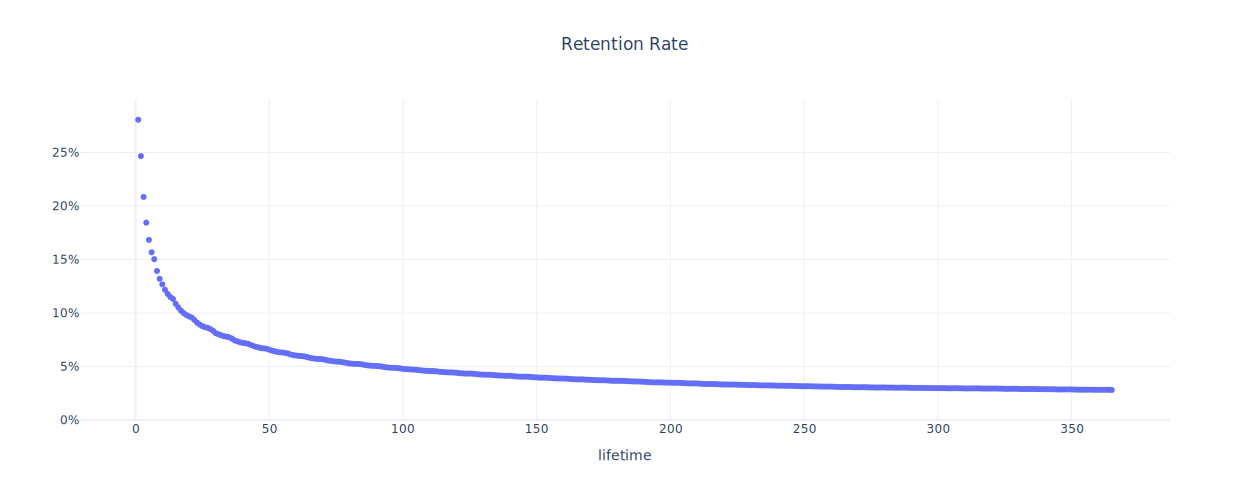

In [4]:
fig = go.Figure(go.Scatter(x=x,y=retention,mode='markers', name='True'))
fig.update_layout(template='plotly_white', 
                  width=1250, 
                  xaxis_title='lifetime', 
                  yaxis={'tickformat':'.0%','rangemode':'tozero'},
                  title={'text':'Retention Rate','x':.5})
fig.show(renderer='svg')

In [5]:
def hyperbolic_func(X, params):
    A, B, C, D, E = params
    return A / (np.log(X + E)**D + B) + C

def mse(params):
    retention_pred = hyperbolic_func(x, params)
    return np.mean((retention - retention_pred)**2)

In [6]:
np.random.seed(42)

initial_params = np.random.rand(5)

In [7]:
bfgs = minimize(fun=mse, x0=initial_params)

print(bfgs.message)
if bfgs.success == True:
    print('MSE:',mse(bfgs.x))

Optimization terminated successfully.
MSE: 4.503524009364234e-06


In [8]:
class GradientDescentOpt:
    
    def __init__(self, learning_rate=0.001, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        
    def optimize(self, fun, x0, progress_bar=False):
        x0 = np.asarray(x0)
        
        def gradient(fun, x0):
            epsilon = np.cbrt(np.finfo(float).eps)
            grad = np.zeros_like(x0)
            for i in range(len(x0)):
                x_forward, x_backward = x0.copy(), x0.copy()
                x_forward[i] += epsilon
                x_backward[i] -= epsilon
                grad[i] = (fun(x_forward) - fun(x_backward)) / (2 * epsilon)
            return grad
        
        rng = tqdm(range(self.n_iterations)) if progress_bar else range(self.n_iterations)

        for _ in rng:
            grad = gradient(fun, x0)
            x0 = x0 - self.learning_rate * grad  
            
        return x0

In [9]:
gdo = GradientDescentOpt(0.96, 100_000)
descent_params = gdo.optimize(mse, initial_params, progress_bar=True)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [10]:
print('MSE:',mse(descent_params)) 

MSE: 1.6360472315080997e-06


In [11]:
np.random.seed(42)

bounds = [(-2, 2), (-2, 2), (-2,2), (-2, 2), (0, 2)]

In [12]:
def monte_carlo_opt(fun, bounds, minimize=True, num_samples=1_000_000, random_state=None, progress_bar=False):
    np.random.seed(random_state)
    
    best_params = None
    best_loss = None

    lh = defaultdict(tuple)
    for i in bounds:
        lh['low'] += (i[0],)
        lh['high'] += (i[1],)
    
    params = np.random.uniform(lh['low'], lh['high'], size=(num_samples,len(bounds)))
    
    rng = tqdm(params) if progress_bar else params
    
    for i in rng:
        loss = fun(i)
        
        if minimize:
            if best_loss is None or loss < best_loss:
                best_params = i
                best_loss = loss
        else:
            if best_loss is None or loss > best_loss:
                best_params = i
                best_loss = loss
                
    return best_params, best_loss

In [13]:
montecarlo_params, loss = monte_carlo_opt(mse, bounds, num_samples=1_000_000, random_state=42, progress_bar=True)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [14]:
print('MSE:',loss)

MSE: 3.1318598425233074e-06


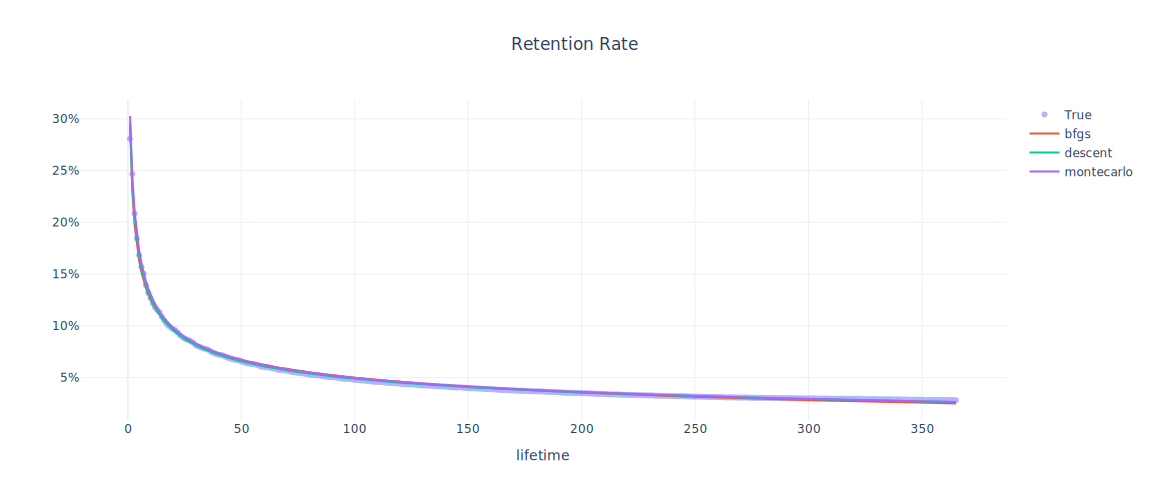

In [15]:
fig = go.Figure([go.Scatter(x=x,y=retention,mode='markers', name='True', opacity=0.5),
                 go.Scatter(x=x,y=hyperbolic_func(x,bfgs.x),mode='lines', name='bfgs'),
                 go.Scatter(x=x,y=hyperbolic_func(x,descent_params), mode='lines', name='descent'),
                 go.Scatter(x=x,y=hyperbolic_func(x,montecarlo_params), mode='lines', name='montecarlo')])
fig.update_layout(template='plotly_white', 
                  width=1150, 
                  xaxis_title='lifetime', 
                  yaxis={'tickformat':'.0%'},
                  title={'text':'Retention Rate','x':.5})
fig.show(renderer='svg')

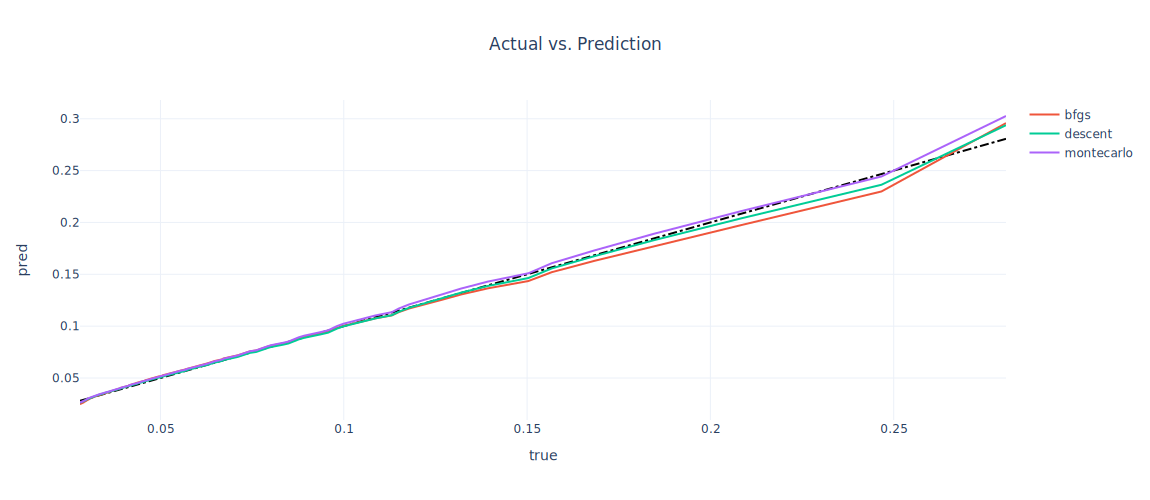

In [16]:
fig = go.Figure([go.Scatter(x=retention,y=retention,line=dict(width=2,dash='dashdot',color='black'), showlegend=False),
                 go.Scatter(x=retention,y=hyperbolic_func(x,bfgs.x), name='bfgs'),
                 go.Scatter(x=retention,y=hyperbolic_func(x,descent_params), name='descent'),
                 go.Scatter(x=retention,y=hyperbolic_func(x,montecarlo_params), name='montecarlo')
                ])
fig.update_layout(template='plotly_white', 
                  width=1150,
                  xaxis_title='true',
                  yaxis_title='pred',
                  title={'text':'Actual vs. Prediction','x':.5})
fig.show(renderer='svg')